In [1]:
from sklearn.datasets import load_files

In [2]:
import os

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm_notebook

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import eli5
from scipy.sparse import hstack, vstack

from wordcloud import WordCloud, STOPWORDS
from collections import defaultdict
import plotly.graph_objs as go
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import textblob
import string

In [11]:
print(os.listdir())

['.ipynb_checkpoints', 'ML_COURSE_IMDB_TEXT.ipynb', 'Text_analysis_1.ipynb', 'IMDB_KERAS.ipynb', 'imdb', 'Reuters_keras.ipynb']


In [12]:
PATH="imdb/"

In [15]:
os.listdir(PATH+"train" + "/" + "neg")

['6001_2.txt',
 '7083_1.txt',
 '10785_1.txt',
 '373_4.txt',
 '11408_1.txt',
 '4121_2.txt',
 '3949_1.txt',
 '646_1.txt',
 '4459_1.txt',
 '10246_2.txt',
 '6268_1.txt',
 '6236_1.txt',
 '1907_2.txt',
 '2029_3.txt',
 '9529_2.txt',
 '6963_4.txt',
 '6627_2.txt',
 '3952_1.txt',
 '11688_1.txt',
 '5879_1.txt',
 '8784_3.txt',
 '9386_2.txt',
 '10653_4.txt',
 '5419_1.txt',
 '11619_1.txt',
 '2519_2.txt',
 '11520_3.txt',
 '2103_2.txt',
 '20_1.txt',
 '7_3.txt',
 '2385_1.txt',
 '9323_2.txt',
 '732_1.txt',
 '2735_4.txt',
 '6395_3.txt',
 '10257_1.txt',
 '4534_2.txt',
 '11415_1.txt',
 '10871_4.txt',
 '8389_1.txt',
 '7301_3.txt',
 '1025_2.txt',
 '9083_1.txt',
 '986_2.txt',
 '8453_1.txt',
 '10560_3.txt',
 '11080_1.txt',
 '3679_3.txt',
 '556_1.txt',
 '2017_1.txt',
 '12051_2.txt',
 '843_1.txt',
 '12381_1.txt',
 '2720_3.txt',
 '7140_1.txt',
 '12482_4.txt',
 '5543_2.txt',
 '6126_1.txt',
 '3220_4.txt',
 '5239_3.txt',
 '12392_4.txt',
 '12108_4.txt',
 '8212_2.txt',
 '11116_4.txt',
 '12337_1.txt',
 '6216_2.txt',
 '

In [17]:
with open(PATH + "train" + "/" + "neg" + "/" + "6001_2.txt") as f:
    print(f.read())

This may sound crazy to even the people who remember this show...But I remembered this as being live-action. I don't think I ever saw the cartoon. but movie? maybe. I remember it very clearly. The guy was in a building kinda like a showroom. He even had the red jacket. It was dark out and he turned into a red car and there was this guy on the second level looking down at him. The car/guy spun around and crashed through the big showroom type window and out onto the street. And then proceeded to drive off. That is all I remember. I really hope someone else out there remembers this too. If not, Maybe I'm still crazy. But I'm hoping I'm not.


In [18]:
train_text=[]
test_text=[]
train_label=[]
test_label=[]

for train_test in ["train", "test"]:
    for neg_pos in ["neg", "pos"]:
        file_path=PATH + train_test + "/" + neg_pos + "/"
        for file in tqdm_notebook(os.listdir(file_path)): #tqdm - для показа линии прогресса выполнения задачи
            with open(file_path + file, "r" ) as f:
                if train_test == "train":
                    train_text.append(f.read())
                    if neg_pos == "neg":
                        train_label.append(0)
                    else:
                        train_label.append(1)
                else:
                    test_text.append(f.read())
                    if neg_pos == "neg":
                        test_label.append(0)
                    else:
                        test_label.append(1)

In [20]:
len(train_text)

25000

In [21]:
X_train=pd.DataFrame()

In [22]:
X_train["review"] = train_text
X_train["label"] = train_label

X_test=pd.DataFrame()
X_test["review"] = test_text
X_test["label"] = test_label

In [23]:
X_train.head()

,review,label
0,This may sound crazy to even the people who re...,0
1,My husband rented this from a video store thin...,0
2,"Wow, what a great cast! Julia Roberts, John Cu...",0
3,Blank Check is a movie that I saw on TV one da...,0
4,This was just plain terrible. I read this book...,0


In [24]:
X_test.head()

,review,label
0,I thought of this movie when i watched pluto n...,0
1,I have yet to watch STARCRASH (1979) - that no...,0
2,I know that this show gave a lot of liberation...,0
3,With an interesting premise (in the conflicts ...,0
4,Do you hear that sound? That's the sound of H....,0


# Исследовательский анализ данных

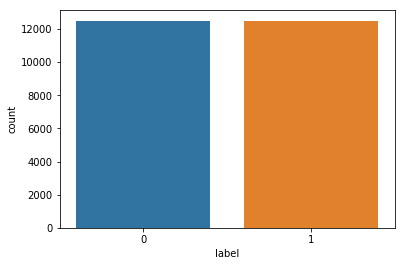

In [25]:
sns.countplot(X_train["label"])

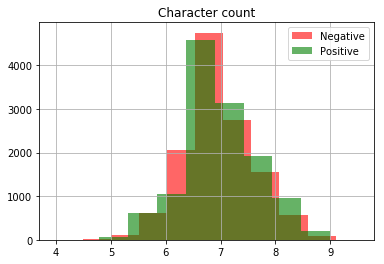

In [31]:
X_train[X_train["label"] == 0]["review"].apply(lambda x: np.log1p(len(x))).hist(alpha = 0.6, color = "red", 
                                                                                label="Negative")
X_train[X_train["label"] == 1]["review"].apply(lambda x: np.log1p(len(x))).hist(alpha = 0.6, color="green",
                                                                               label="Positive")
plt.title("Character count")
plt.legend();

Из приведенного выше графика видно, что положительные и отрицательные отзывы имеют примерно одинаковую длину

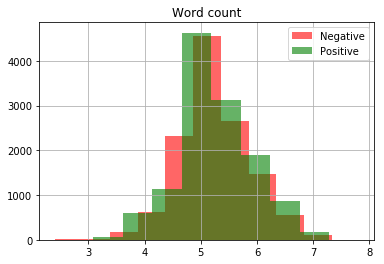

In [32]:
X_train[X_train["label"] == 0]["review"].apply(lambda x: np.log1p(len(x.split()))).hist(alpha = 0.6, color = "red", 
                                                                                label="Negative")
X_train[X_train["label"] == 1]["review"].apply(lambda x: np.log1p(len(x.split()))).hist(alpha = 0.6, color="green",
                                                                               label="Positive")
plt.title("Word count")
plt.legend();

Также мы видим, что положительные и отрицательные отзывы содержат примерно одинаковое количество слов.


# Облако слов

In [40]:
wordcloud=WordCloud(background_color="black", stopwords=set(STOPWORDS), max_words = 200, height=400, width=800)

In [41]:
wordcloud.generate(str(X_train[X_train["label"] == 1]["review"]))

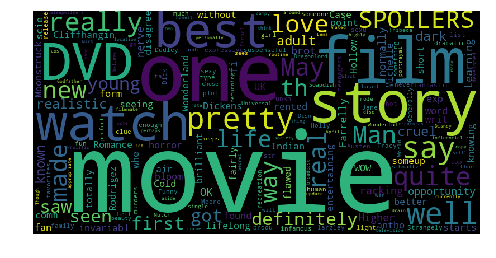

In [48]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wordcloud)

In [49]:
wordcloud.generate(str(X_train[X_train["label"] == 0]["review"]))

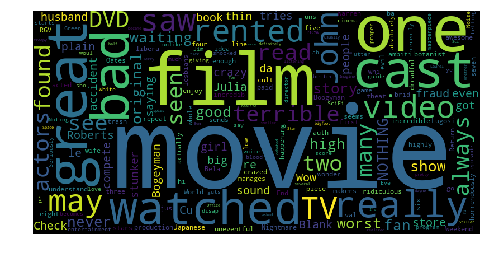

In [50]:
plt.figure(figsize=(8,8))
plt.axis("off")
plt.imshow(wordcloud)

Как мы видим, обе категории содержат такие популярные слова, как «Кино» и «Кино», и это не удивительно, потому что мы имеем дело с обзорами фильмов. Еще есть несколько интересных моментов.

Отрицательные отзывы содержат такие слова, как: «Действительно» (может использоваться с сарказмом или просто для усиления мнения человека), «Ужасно», «Дрянной» (ничего хорошего в фильме).

Положительные отзывы содержат такие слова, как: «Эмоциональный», «Блестящий», «Забавный», «Удивительный», «Лучший», «Страстный» (которые обычно используются для выражения чьего-либо удовлетворения).

Хотя «World Cloud» - это очень впечатляющий способ показать некоторые идеи, обычно для лучшего понимания нам лучше использовать более распространенные методы.

# Обучение логистической регрессии для бинарной классификации

In [51]:
X_train_train, X_train_valid, y_train_train, y_train_valid = train_test_split(X_train["review"].values, 
    X_train["label"].values, test_size=0.3, random_state=20)

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
X_train_train.shape, X_train_valid.shape

((17500,), (7500,))

In [58]:
vect = TfidfVectorizer(ngram_range=(1,1), max_features=50000)

In [60]:
logit=LogisticRegression(C=1, random_state=20)

In [62]:
pipe=Pipeline([
    ("vect", vect),
    ("logit", logit)
])

In [64]:
tqdm_notebook(pipe.fit(X_train_train, y_train_train))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0it [00:00, ?it/s]

In [66]:
pred_valid=pipe.predict(X_train_valid)

In [67]:
accuracy_score(y_train_valid, pred_valid)

0.8865333333333333

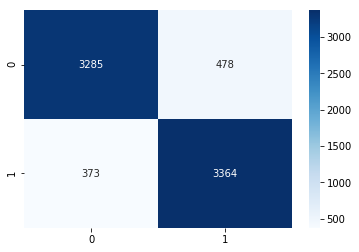

In [73]:
sns.heatmap(confusion_matrix(y_train_valid, pred_valid), annot=True, fmt="g", cmap="Blues")

Мы видим, что нашей модели удалось классифицировать негативные и позитивные отзывы примерно с одинаковым успехом. Тем не менее, наша модель склонна классифицировать отрицательные отзывы как положительные чаще, чем положительные как отрицательные.

##  Влияние признаков

Далее мы попытаемся понять, какие Unigrams (в нашей базовой модели мы использовали только Unigrams), оказывают наибольшее влияние на нашу модель.


In [74]:
eli5.show_weights(vec=pipe.named_steps["vect"], estimator=pipe.named_steps["logit"], top=10)

# CountVectorizer - создание векторов слов, по встречаемости их в предложениях (разреженная матрица)

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

In [76]:
cvect=CountVectorizer(ngram_range=(1,3), max_features = 100000)
logit = LogisticRegression(C=1, random_state=20)

n_gram - биграммы, дополнительные признаки, смотрятся соседние слова, увеличивается признаковое пространство

In [78]:
pipe_new=Pipeline([
    ("vect", cvect),
    ("logit", logit)
])

In [79]:
%%time
pipe_new.fit(X_train_train, y_train_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



CPU times: user 40.6 s, sys: 1.23 s, total: 41.8 s
Wall time: 51.7 s


Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        str..., penalty='l2', random_state=20, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [80]:
pred_val=pipe.predict(X_train_valid)

In [81]:
accuracy_score(y_train_valid, pred_val)

0.8865333333333333

In [83]:
eli5.show_weights(vec=pipe_new.named_steps["vect"], estimator=pipe_new.named_steps["logit"], top=10)

# Лемматизация

Лемматизация является частью задачи нормализации текста. Некоторые слова могут отличаться, но они могут иметь один и тот же корень. Во время лемматизации мы будем изменять разные слова с одинаковым корнем в их первоначальной форме.

In [84]:
import nltk.stem 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [85]:
lem=WordNetLemmatizer()

In [98]:
from sklearn.feature_extraction.text import HashingVectorizer
from xgboost import XGBClassifier

In [115]:
hash_vect=HashingVectorizer(n_features=10000, stop_words=set(STOPWORDS))

In [116]:
xgb_clf=XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, min_child_weight=5)

In [117]:
pipe_hash= Pipeline([
    ("vect", hash_vect),
    ("xgb", xgb_clf)
])

In [118]:
pipe_hash.fit(X_train_train, y_train_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:286: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.



Pipeline(memory=None,
     steps=[('vect', HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=10000, ngram_range=(1, 1), non_negative=False,
         norm='l2', prep...
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1))])

In [119]:
pred_hash=pipe_hash.predict(X_train_valid)

In [120]:
accuracy_score(y_train_valid, pred_hash)

0.8150666666666667

In [121]:
from sklearn.linear_model import SGDClassifier

In [122]:
sgd_clf=SGDClassifier()

In [123]:
pipe_sgd= Pipeline([
    ("vect", hash_vect),
    ("sgd", sgd_clf)
])

In [124]:
pipe_sgd.fit(X_train_train, y_train_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



Pipeline(memory=None,
     steps=[('vect', HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=10000, ngram_range=(1, 1), non_negative=False,
         norm='l2', prep...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [125]:
pred_sgd=pipe_sgd.predict(X_train_valid)

In [126]:
accuracy_score(y_train_valid, pred_sgd)

0.8704

## А теперь попробуем биграммы в CountVectorizer

In [127]:
cvect=CountVectorizer(ngram_range=(1,2), max_features=100000)

In [131]:
pipe_cvect=Pipeline([
    ("vect", cvect),
    ("sgd", sgd_clf)
])

In [132]:
pipe_cvect.fit(X_train_train, y_train_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        str...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [133]:
pred_sgd=pipe_cvect.predict(X_train_valid)

In [135]:
accuracy_score(y_train_valid, pred_sgd)

0.8808

Качество классификации выросло на порядок

Таким образом в **CountVectorizer** необходимо использовать биграммы или триграммы n_grams -это доп признаки, которые улучшают качество классификации. ТАкже необходимо ограничивать признаковое пространство **max_features** и для быстроты использовать **SGDClassifier**

# Еще один подход для работы с большими выборками, текстовыми данными и категориальными признаками